## Traffic Signs Recognition using CNN & Keras

### Our approach to building this traffic sign classification model is discussed in four steps:

- Explore the dataset
- Build a CNN model
- Train and validate the model
- Test the model with test dataset

In [54]:
!pip install tensorflow keras sklearn matplotlib pandas pil


ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


### Explore the dataset

Our ‘train’ folder contains 43 folders each representing a different class. The range of the folder is from 0 to 42. With the help of the OS module, we iterate over all the classes and append images and their respective labels in the data and labels list.

The PIL library is used to open image content into an array

In [197]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [175]:
import os

In [176]:
cd/Users/IRON MAN/dataset/Train

C:\Users\IRON MAN\dataset\Train


In [177]:
os.getcwd()

'C:\\Users\\IRON MAN\\dataset\\Train'

In [178]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)



    

(39209, 30, 30, 3) (39209,)


Finally, we have stored all the images and their labels into lists (data and labels). We need to convert the list into numpy arrays for feeding to the model. The shape of data is (39209, 30, 30, 3) which means that there are 39,209 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value). With the sklearn package, we use the train_test_split() method to split training and testing data.

From the keras.utils package, we use to_categorical method to convert the labels present in y_train and t_test into one-hot encoding.

In [179]:

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [180]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [181]:
cd/Users/IRON MAN/dataset/Train/0

C:\Users\IRON MAN\dataset\Train\0


## Let's See Image

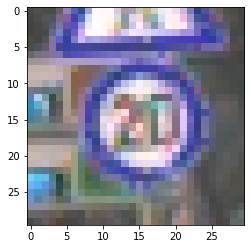

In [183]:
i_path = os.getcwd() + '//' + '00000_00000_00001.png'
plt.imshow(cv2.imread(i_path, -1))

## Build a CNN model

In [184]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Train and validate the model

In [185]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
491/491 [==============================] - 139s 280ms/step - loss: 4.3252 - accuracy: 0.2773 - val_loss: 0.5134 - val_accuracy: 0.8781
Epoch 2/15
491/491 [==============================] - 143s 291ms/step - loss: 0.8027 - accuracy: 0.7730 - val_loss: 0.2056 - val_accuracy: 0.9467
Epoch 3/15
491/491 [==============================] - 140s 285ms/step - loss: 0.4755 - accuracy: 0.8646 - val_loss: 0.1184 - val_accuracy: 0.9681
Epoch 4/15
491/491 [==============================] - 138s 282ms/step - loss: 0.3356 - accuracy: 0.9043 - val_loss: 0.1147 - val_accuracy: 0.9705
Epoch 5/15
491/491 [==============================] - 138s 281ms/step - loss: 0.2898 - accuracy: 0.9172 - val_loss: 0.0742 - val_accuracy: 0.9792
Epoch 6/15
491/491 [==============================] - 148s 302ms/step - loss: 0.2293 - accuracy: 0.9338 - val_loss: 0.0684 - val_accuracy: 0.9781
Epoch 7/15
491/491 [==============================] - 139s 283ms/step - loss: 0.2131 - accuracy: 0.9372 - val_loss: 0.0664 -

## Plotting graphs for accuracy

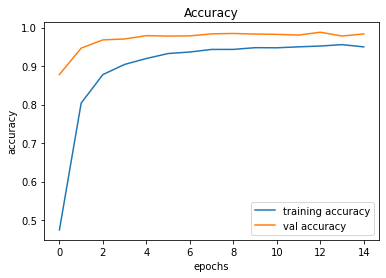

In [186]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


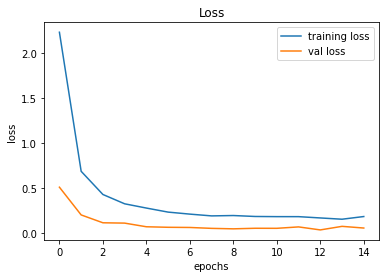

In [187]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Evaluation

In [188]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.06011519581079483
Test accuracy 0.9836776256561279


In [189]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [190]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.99      0.96      0.97       496
           2       0.97      0.98      0.97       420
           3       0.99      0.99      0.99       294
           4       0.96      1.00      0.98       400
           5       0.98      0.95      0.97       364
           6       1.00      1.00      1.00        69
           7       0.99      0.97      0.98       313
           8       0.96      0.99      0.97       274
           9       0.98      1.00      0.99       277
          10       0.99      1.00      0.99       398
          11       1.00      0.98      0.99       261
          12       1.00      0.99      0.99       443
          13       1.00      1.00      1.00       422
          14       1.00      0.97      0.98       135
          15       0.96      0.98      0.97       118
          16       1.00      1.00      1.00        86
          17       1.00    

In [191]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)


cm

array([[ 34,   2,   0, ...,   0,   0,   0],
       [  1, 477,   4, ...,   0,   0,   0],
       [  0,   2, 412, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  75,   0,   0],
       [  0,   0,   0, ...,   0,  39,   0],
       [  0,   0,   0, ...,   0,   0,  46]], dtype=int64)

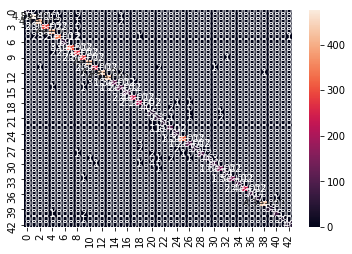

In [192]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [194]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9836776332568222